# Widgets 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv("dvf_loyers.csv", sep=";")

### Widget 1 : Rendement Locatif Brut par Arrondissement à Paris

Formule du rendement brut : rendement_brut = (loyer_mensuel_total * 12) / prix_achat * 100

In [18]:
df['rendement_brut'] = (df['loyer_ref_m2'] * df['surface_reelle_bati'] * 12) / df['valeur_fonciere'] * 100

Moyenne du rendement brut par arrondissement, trié dans l'ordre décroissant

In [19]:
rendement_arr = df.groupby('arrondissement')['rendement_brut'].mean().sort_values(ascending=False)

Affichage du widget

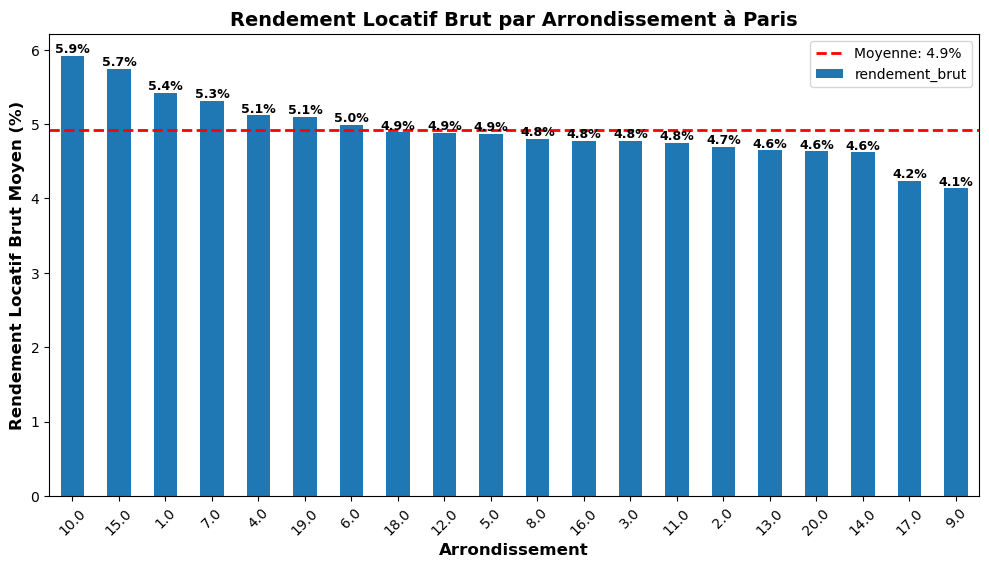

In [20]:
rendement_arr.plot(kind='bar', figsize=(12, 6))

for i, v in enumerate(rendement_arr.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel('Arrondissement', fontsize=12, fontweight='bold')
plt.ylabel('Rendement Locatif Brut Moyen (%)', fontsize=12, fontweight='bold')
plt.title('Rendement Locatif Brut par Arrondissement à Paris', fontsize=14, fontweight='bold')
plt.axhline(y=rendement_arr.mean(), color='red', linestyle='--', linewidth=2, label=f'Moyenne: {rendement_arr.mean():.1f}%')
plt.legend()
plt.xticks(rotation=45)
plt.show()

### Widget 2 : Top 15 quartiers les plus rentables - Bar chart horizontal

on cherche les 15 quartiers les plus rentables en rendement brute

In [21]:
quartiers_rentables = df.groupby('quartier')['rendement_brut'].mean().sort_values(ascending=False).head(15)

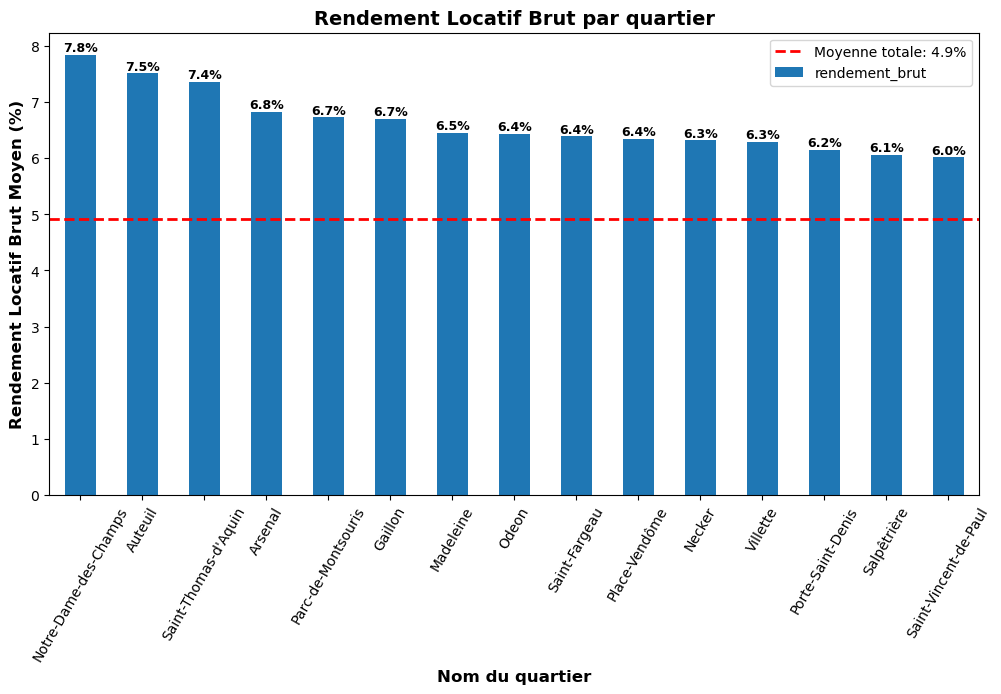

In [22]:
moyenne_rendement_brut_total = df['rendement_brut'].mean()
quartiers_rentables.plot(kind='bar', figsize=(12, 6))

for i, v in enumerate(quartiers_rentables.values):
    plt.text(i, v, f'{v:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.xlabel('Nom du quartier', fontsize=12, fontweight='bold')
plt.ylabel('Rendement Locatif Brut Moyen (%)', fontsize=12, fontweight='bold')
plt.title('Rendement Locatif Brut par quartier', fontsize=14, fontweight='bold')
plt.axhline(y=moyenne_rendement_brut_total, color='red', linestyle='--', linewidth=2, label=f'Moyenne totale: {moyenne_rendement_brut_total:.1f}%')
plt.legend()
plt.xticks(rotation=60)
plt.show()

### Widget 3 : Map du rendement brut locatif par quartier

In [23]:
import pandas as pd
import plotly.express as px

# 1️⃣ Chargement du fichier
df = pd.read_csv("dvf_loyers.csv", sep=';', encoding='utf-8')

# 2️⃣ Calcul du rendement locatif brut (%)
df['rendement_brut'] = (df['loyer_ref_m2'] * df['surface_reelle_bati'] * 12) / df['valeur_fonciere'] * 100

# 3️⃣ Nettoyage des données
df = df.dropna(subset=['latitude', 'longitude', 'quartier', 'rendement_brut'])

# 4️⃣ Calcul du rendement moyen par quartier
# On regroupe uniquement par le nom du quartier
rendement_quartier = (
    df.groupby('quartier', as_index=False)
    .agg({
        'rendement_brut': 'mean',
        'latitude': 'mean',     # moyenne des points du quartier pour positionner le marqueur
        'longitude': 'mean'
    })
)

# 5️⃣ Carte interactive
fig = px.scatter_mapbox(
    rendement_quartier,
    lat='latitude',
    lon='longitude',
    color='rendement_brut',
    color_continuous_scale='RdYlGn',  # Rouge (faible) → vert (fort)
    range_color=[rendement_quartier['rendement_brut'].min(), rendement_quartier['rendement_brut'].max()],
    size='rendement_brut',
    size_max=15,
    hover_name='quartier',
    hover_data={'rendement_brut': ':.2f'},
    zoom=11,
    mapbox_style='carto-positron',
    title='Rendement locatif brut moyen par quartier à Paris'
)

fig.show()


### Widget 4 : Filtrage par superficie

In [ ]:
import pandas as pd
import plotly.express as px
from ipywidgets import interact, FloatRangeSlider

# 1️⃣ Chargement du fichier
df = pd.read_csv("dvf_loyers.csv", sep=';', encoding='utf-8')

# 2️⃣ Calcul du rendement locatif brut (%)
df['rendement_brut'] = (df['loyer_ref_m2'] * df['surface_reelle_bati'] * 12) / df['valeur_fonciere'] * 100

# 3️⃣ Nettoyage des données
df = df.dropna(subset=['latitude', 'longitude', 'quartier', 'rendement_brut', 'surface_reelle_bati'])
df['surface_reelle_bati'] = df['surface_reelle_bati'].astype(float)
df['rendement_brut'] = df['rendement_brut'].astype(float)

# 🔧 Filtrage global du rendement entre 2.5 % et 9 %
df = df[(df['rendement_brut'] >= 2.5) & (df['rendement_brut'] <= 9)]

# 4️⃣ Fonction d'affichage dynamique
def afficher_carte(surface_range=(0, df['surface_reelle_bati'].max())):
    surface_min, surface_max = surface_range
    
    # Filtrer les logements selon la plage de surface choisie
    dff = df[(df['surface_reelle_bati'] >= surface_min) & (df['surface_reelle_bati'] <= surface_max)]
    
    # Calcul du rendement moyen par quartier
    rendement_quartier = (
        dff.groupby('quartier', as_index=False)
        .agg({
            'rendement_brut': 'mean',
            'latitude': 'mean',
            'longitude': 'mean'
        })
    )
    
    # Création de la carte interactive
    fig = px.scatter_mapbox(
        rendement_quartier,
        lat='latitude',
        lon='longitude',
        color='rendement_brut',
        color_continuous_scale='RdYlGn',  # rouge -> vert
        range_color=[2.5, 9],  # 🔥 Échelle fixée de 2.5% à 9%
        size='rendement_brut',
        size_max=15,
        hover_name='quartier',
        hover_data={'rendement_brut': ':.2f'},
        zoom=11,
        mapbox_style='carto-positron',
        title=f"Rendement locatif brut moyen par quartier à Paris\n(Surfaces {surface_min:.0f} à {surface_max:.0f} m²)"
    )
    
    fig.show()

# 5️⃣ Curseur interactif pour la surface
interact(
    afficher_carte,
    surface_range=FloatRangeSlider(
        value=[0, 100],
        min=0,
        max=df['surface_reelle_bati'].max(),
        step=5,
        description='Surface (m²)',
        continuous_update=False,
        layout={'width': '800px'}
    )
);



interactive(children=(FloatRangeSlider(value=(0.0, 100.0), continuous_update=False, description='Surface (m²)'…

### Distribution des loyers à Paris

Colonnes disponibles : ['date_mutation', 'valeur_fonciere', 'surface_reelle_bati', 'nombre_pieces_principales', 'longitude', 'latitude', 'adresse_nom_voie', 'nom_commune', 'prix_m2', 'arrondissement', 'quartier', 'numero_insee_quartier', 'loyer_ref_m2', 'loyer_majore_m2', 'loyer_minore_m2', 'distance_quartier_m']


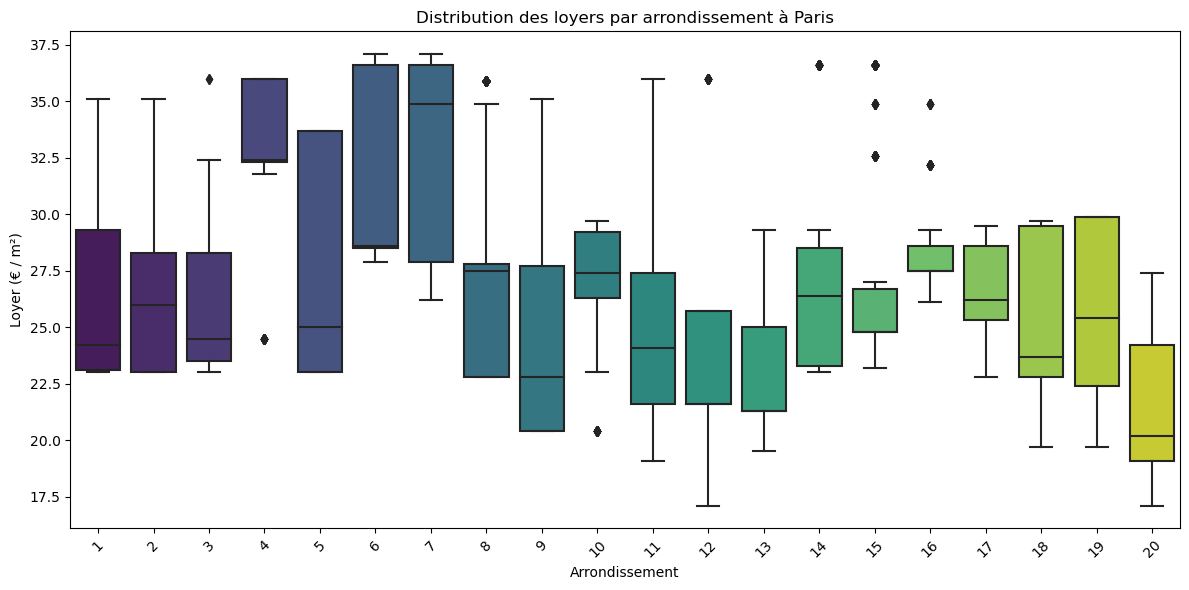

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Chargement du fichier
df = pd.read_csv("dvf_loyers.csv", sep=';', encoding='utf-8')

# 2️⃣ Vérification des colonnes disponibles
print("Colonnes disponibles :", df.columns.tolist())

# 3️⃣ Création d'une colonne 'Loyers de référence' si elle n'existe pas
if 'Loyers de référence' not in df.columns and 'loyer_ref_m2' in df.columns:
    df['Loyers de référence'] = df['loyer_ref_m2']

# 4️⃣ Nettoyage
df = df.dropna(subset=['Loyers de référence', 'arrondissement'])
df['arrondissement'] = df['arrondissement'].astype(str).str.extract(r'(\d{1,2})')[0].astype(int)

# 5️⃣ Filtrer pour ne garder que Paris (1 à 20)
df = df[(df['arrondissement'] >= 1) & (df['arrondissement'] <= 20)]

# 6️⃣ Création du boxplot
plt.figure(figsize=(12,6))
sns.boxplot(
    data=df,
    x='arrondissement',
    y='Loyers de référence',
    palette='viridis'
)

plt.title("Distribution des loyers par arrondissement à Paris")
plt.xlabel("Arrondissement")
plt.ylabel("Loyer (€ / m²)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_61244\3996661470.py:34: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.

c:\Users\Utilisateur\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning:

Glyph 128202 (\N{BAR CHART}) missing from current font.



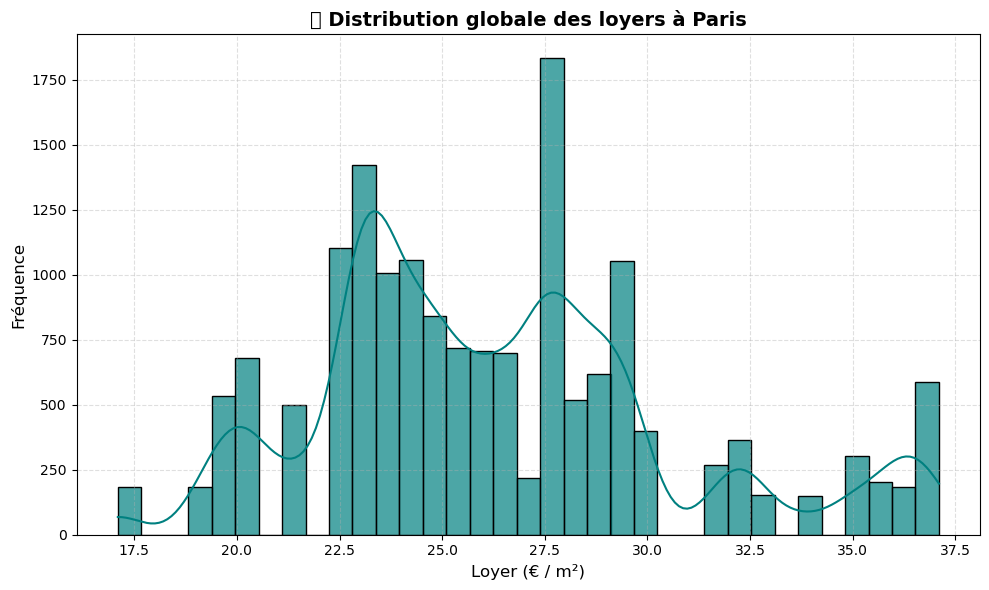

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1️⃣ Chargement du fichier
df = pd.read_csv("dvf_loyers.csv", sep=';', encoding='utf-8')

# 2️⃣ Création de la colonne "Loyers de référence" si elle n’existe pas
if 'Loyers de référence' not in df.columns and 'loyer_ref_m2' in df.columns:
    df['Loyers de référence'] = df['loyer_ref_m2']

# 3️⃣ Nettoyage
df = df.dropna(subset=['Loyers de référence'])
df['Loyers de référence'] = df['Loyers de référence'].astype(float)

# 🔧 Filtrage pour ne garder que les loyers cohérents
df = df[(df['Loyers de référence'] >= 15) & (df['Loyers de référence'] <= 45)]

# 4️⃣ Histogramme optimisé
plt.figure(figsize=(10,6))
sns.histplot(
    df['Loyers de référence'],
    bins=35,              # ➕ plus de bins pour une meilleure finesse
    color='teal',
    kde=True,
    edgecolor='black',
    alpha=0.7
)

plt.title("📊 Distribution globale des loyers à Paris", fontsize=14, fontweight='bold')
plt.xlabel("Loyer (€ / m²)", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
